In [ ]:
# for colab
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
project_dir = '/content/gdrive/My Drive/ColabNotebooks/AI'
import sys
sys.path.insert(0, project_dir)

# Step by step mcts

In [ ]:
import mcts
import policy

In [ ]:
root = mcts.Node(None, None, 1.)
policy_net = policy.Policy()

In [ ]:
node = root.select_best_leaf()

print([(float(i.value_sum),i.P,  i.env.formula, i.times_visited) for i in root.children], )
print(node.env.formula)

if node.is_done:
    node.propagate(0)
else:
    a_prob, val_s = policy_net.policy_value_function(node.env.formula)
    node.expand(a_prob)

    

In [ ]:
node.env.formula, policy_net.env.action_space

# Step by step 2



        

In [1]:
#from mcts import ReplayBuffer, plan_mcts, Node
import mcts
import policy
import matplotlib.pyplot as plt


In [2]:
import importlib
#import mcts
importlib.reload(mcts)
importlib.reload(policy)

<module 'policy' from '/home/denis/Program/Shad/MyExpirement/AI/policy.py'>

In [3]:
policy_net = policy.Policy()
replay_buffer = mcts.ReplayBuffer()

In [4]:
import numpy as np
#import torch
#torch.min(torch.Tensor([1]),torch.Tensor([4])), torch.Tensor([1])

s = np.random.dirichlet((1,1,1,1,1,1,1,1), 1)[0]
s

array([0.15440221, 0.18387447, 0.0354534 , 0.13989331, 0.04080003,
       0.16936503, 0.12502273, 0.15118883])

In [5]:
reward = []
root = mcts.Node(None, None, 1.)
for i in range(10):
    print(i)
    rew = mcts.plan_mcts(root, policy_net, replay_buffer, n_iters=2000)
    replay_buffer.get_states(root)
    policy_net.train_model(replay_buffer)
    reward.extend(rew)

#print(policy_net.loss_backet)    


0


/home/denis/Program/Shad/MyExpirement/AI/policy.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(Variable(Tensor(x))).data.numpy()


1
2
3
get_reward mcts plan! isieo
get_reward mcts plan! isieo
get_reward mcts plan! isieo
get_reward mcts plan! isieo
get_reward mcts plan! isieo
get_reward mcts plan! isieo
get_reward mcts plan! isieo
get_reward mcts plan! isieo
get_reward mcts plan! isieo
get_reward mcts plan! isieo
get_reward mcts plan! isieo
get_reward mcts plan! isieo
get_reward mcts plan! isieo
get_reward mcts plan! isieo
get_reward mcts plan! isieo
get_reward mcts plan! isieo
get_reward mcts plan! isieo
get_reward mcts plan! isieo
get_reward mcts plan! isieo
get_reward mcts plan! isieo
get_reward mcts plan! isieo
get_reward mcts plan! isieo
get_reward mcts plan! isieo
get_reward mcts plan! isieo
get_reward mcts plan! isieo
get_reward mcts plan! isieo
get_reward mcts plan! isieo
get_reward mcts plan! isieo
get_reward mcts plan! isieo
get_reward mcts plan! isieo
get_reward mcts plan! isieo
get_reward mcts plan! isieo
get_reward mcts plan! isieo
get_reward mcts plan! isieo
get_reward mcts plan! isieo
get_reward mct

RuntimeError: value cannot be converted to type double without overflow: -inf

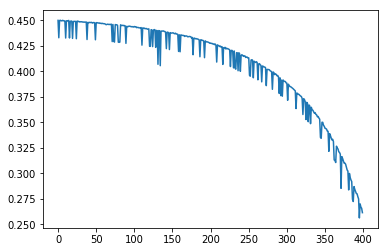

In [71]:
plt.plot(policy_net.loss_backet[:400])
#plt.plot(reward)
plt.show()

In [72]:
import pandas as pd

In [75]:
values = {'1': 1, 'i': 0, 'o': 0, 'A': 0, 'B': 0, 'C': 0}
keys=list(values) + ['s', 'e']

dd = {'formula':[], 'val_sum':[]}
for i in replay_buffer.replay:
    dd['formula'].append(i[2])
    dd['val_sum'].append(i[3].value_sum)
    
    for j, k in enumerate(keys):
        #print('j', j, i[4])
        #print(i, i[4][j])
        dd[k] = i[4][j]

df = pd.DataFrame(dd)

In [76]:
df[df['formula']=='']#['ucb'].idxmax()

,1,A,B,C,e,formula,i,o,s,val_sum
0,0.124302,0.125329,0.12528,0.125373,0.124087,,0.12501,0.125094,0.125525,-190.2
8,0.124302,0.125329,0.12528,0.125373,0.124087,,0.12501,0.125094,0.125525,-276.4
24,0.124302,0.125329,0.12528,0.125373,0.124087,,0.12501,0.125094,0.125525,-266.8
40,0.124302,0.125329,0.12528,0.125373,0.124087,,0.12501,0.125094,0.125525,-265.2
56,0.124302,0.125329,0.12528,0.125373,0.124087,,0.12501,0.125094,0.125525,-258.8
67,0.124302,0.125329,0.12528,0.125373,0.124087,,0.12501,0.125094,0.125525,-235.2
68,0.124302,0.125329,0.12528,0.125373,0.124087,,0.12501,0.125094,0.125525,-151.0
71,0.124302,0.125329,0.12528,0.125373,0.124087,,0.12501,0.125094,0.125525,-200.8
99,0.124302,0.125329,0.12528,0.125373,0.124087,,0.12501,0.125094,0.125525,-235.2
122,0.124302,0.125329,0.12528,0.125373,0.124087,,0.12501,0.125094,0.125525,-235.2


In [ ]:
df[df['formula']=='ie']#['ucb'].idxmax()

In [ ]:
replay_buffer.get_batch()

In [ ]:
import torch.nn.functional as F
from torch import Tensor
F.softmax(Tensor([0,0,0])).numpy()

In [ ]:
test_env.reset()
Vocab, Vocab[1]

In [ ]:
j.select_best_leaf().action

In [ ]:
j.select_best_leaf().rollout(env, 10)

In [ ]:
test_env.step(1)

In [ ]:
test_env.step(3)

In [ ]:
test_env.step(1)

In [ ]:
test_env.step(2)

In [ ]:
test_env.step(1)

In [ ]:
test_env.step(3)

# Imetation learning 
### if we already know answer we should show it to mcts tree.

In [ ]:
#text = "input_eq_A A[2]_eq_out"
def text_to_actions(text, vocab=Vocab):
    action_seq = []
    i = 0
    operator = ''
    while i < len(text):
        if text[i] in Vocab:
            action_seq.append(Vocab.index(text[i]))
        else:
            operator += text[i]
            #print('ss', text[i], operator)
            if operator == 'input':
                operator = ''
                
            if operator in Vocab:
                action_seq.append(Vocab.index(operator))
                operator = ''


        i += 1
    return action_seq

for i in text_to_actions(text):
    print(Vocab[i])
text_to_actions(text)
        #print(Vocab.index(i))
        #print(env.step(1))
        #print(env.step(Vocab.index(i)))

In [ ]:
env.reset()

In [ ]:
#text = "input_sum_A" 
for i in text_to_actions(text):
    print(i)
    print(Vocab[i])
    print(env.step(i))

In [ ]:
text = "input_eq_A A[2]_const_AA AA_eq_out" 
c = CalcNode(text)
c.calc(1)

In [ ]:
import importlib
#import mcts
importlib.reload(mcts)

In [ ]:
root_observation = env.reset()
root_snapshot = env.get_snapshot()
root = mcts.Root(root_snapshot,root_observation)

#plan_mcts(root, env, n_iters=10000, t_max=20)

In [ ]:
root.is_leaf()

In [ ]:
while True:
    is_done = env.step(env.action_space.sample())[2]
    if is_done: 
        print("Whoops! We died!")
        break
        
print("final state:")
plt.imshow(env.render('rgb_array'))
plt.show()


In [ ]:
def teach_mcts(root, env, action_seq):
    """
    builds tree with monte-carlo tree search for n_iters iterations
    :param root: tree node to plan from
    :param n_iters: how many select-expand-simulate-propagete loops to make
    """
    #node = root
    #node = mcts.Node(root, action_seq[0], env)
    #root.children.add(node)
    for action in action_seq:
        #print(action)
        #print(node.is_done)
        
        #next_node = mcts.Node(next_node, action, env)
        #node.children.add(mcts.Node(node, action, env))
        #node = next_node
        
        #print(node.is_done)
        node = root.select_best_leaf()
        
        #print(Vocab[node.action])
        
        if node.is_done:
            if node.immediate_reward > 0:
                print("get_reward mcts plan!", node.immediate_reward)  
            
            node.propagate(0)
            #env.reset()
       
        else: #node is not terminal
            
            #print(_)
            #env.reset()
            #self.env.close()
            #self.render()
            node.expand(env)
            #print(Vocab[node.action])
            for i in node.children:
                print('dd', )#Vocab[node.action], node.parent.action)
            ## value = node.rollout(env, 10)
            #if value >0:
            #    print('plan after rolout', value, node.action)
            ##node.propagate(value)

In [ ]:
teach_mcts(root, env, text_to_actions(text))

In [ ]:
p = mcts.Node(root, 2, env)
#p.is_leaf()

In [ ]:
mcts.plan_mcts(root,env)

In [ ]:
for i in root.children:
    print(Vocab[i.action], i.value_sum, len(i.children))

In [ ]:
j = root
while j.children:
    j = j.children.pop()
    print(j.action, len(j.children))